In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from load_data import load_categorical_data
from load_data import load_categorical_more_data
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'load_data'

In [354]:
"""
Use Decision Tree to fit the relationship between 
homeless_real_value and other variables, except 
no_longer_homeless, prevention_duty, and relief duty.
"""

#Read data
categorical_data,local_authority_names,total_duty_owed,total_population_in_households,prevention_duty_owed,relief_duty_owed,support_need_homeless,no_longer_homeless,homeless_real_value,categorical_waiting_list_size,social_housing_lettings_2021,band_A_B_properties,band_C_D_properties,band_E_F_properties,band_G_H_properties,median_prices,median_earning_gross,categorical_median_afforability_ratio,lower_quatile_prices,lower_quatile_earning_gross,categorical_lower_quatile_afforability_ratio = load_categorical_data()

affordableRent_start,social_housing_start,intermediate_start,total_affordable_start,affordable_complete,social_complete,intermediate_complete,total_affordable_complete=load_categorical_more_data()

In [355]:
def mean_absolute_percentage_error(y_true, y_pred): 
    MSPE = mean_squared_error(y_true,y_pred,squared = True)/np.mean(y_true) * 100
    return np.abs(MSPE)

In [356]:
def R2test(test_set,value_set):
    results = []
    for i in  range(len(value_set[0,:])):
        R2 = r2_score(test_set,value_set[:,i])
        results.append(R2)
    return results

In [357]:
# features include duty owed
X = pd.DataFrame([total_duty_owed,\
                  total_population_in_households,\
                  support_need_homeless,\
                  categorical_waiting_list_size,\
                  social_housing_lettings_2021,band_A_B_properties,\
                  band_C_D_properties,band_E_F_properties,band_G_H_properties,\
                  median_prices,median_earning_gross,categorical_median_afforability_ratio,\
                  lower_quatile_prices,lower_quatile_earning_gross,\
                  categorical_lower_quatile_afforability_ratio,\
                  affordableRent_start,social_housing_start,\
                  intermediate_start,total_affordable_start,\
                  affordable_complete,social_complete,intermediate_complete,\
                  total_affordable_complete])

In [358]:
# features without duty owed
X = pd.DataFrame([total_population_in_households,\
                  support_need_homeless,\
                  categorical_waiting_list_size,\
                  social_housing_lettings_2021,band_A_B_properties,\
                  band_C_D_properties,band_E_F_properties,band_G_H_properties,\
                  median_prices,median_earning_gross,categorical_median_afforability_ratio,\
                  lower_quatile_prices,lower_quatile_earning_gross,\
                  categorical_lower_quatile_afforability_ratio,\
                  affordableRent_start,social_housing_start,\
                  intermediate_start,total_affordable_start,\
                  affordable_complete,social_complete,intermediate_complete,\
                  total_affordable_complete])

In [359]:
X = X.transpose()
Y = homeless_real_value

In [360]:
#Split train and test data, their ratio is 7 to 3:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y, test_size=0.3, random_state=0)

In [361]:
#Fit a Decision Tree
regr = DecisionTreeRegressor(max_depth=10)
regr = regr.fit(train_X, train_Y)

In [362]:
print('Auto Generated Max Depth:'+str(regr.tree_.max_depth))

Auto Generated Max Depth:10


In [363]:
#Predict on the test data
predict_Y = regr.predict(test_X)

In [364]:
predictions = np.array(np.floor(predict_Y).astype(int))
real = np.array(np.array(test_Y).astype(int))
# calculate coefficient matrix
coef = np.corrcoef(predictions, real)
coef = coef[0,1]
# R2 test
r2_score(preditions,real)

# Not very ideal.Needs change.

0.07077400823908908

In [365]:
# analysis to find the best tree. Ranging max depth from 1 to 15+1 (max depth auto + 1), just to show that maximum won't change
depth = 0
r2_score_list = []
coef_list = []
t_test_list = []
max_depth_list = []
real = np.array(np.array(test_Y).astype(int))

for i in range(0,23):
    depth += 1
    regr_now = DecisionTreeRegressor(max_depth=depth,random_state=0)
    regr_now = regr_now.fit(train_X, train_Y)
    predictions = regr_now.predict(test_X)
    predictions = np.array(np.floor(predictions).astype(int))
    # C-Correlation
    coef_list.append(np.corrcoef(predictions,real)[0,1])
    # R2 test
    r2_score_list.append(r2_score(real,predictions))
    # t test
    t_result = ttest(predictions, real)
    t_test_list.append(t_result.pvalue)
    
    # Max depth
    max_depth_list.append(regr_now.tree_.max_depth)

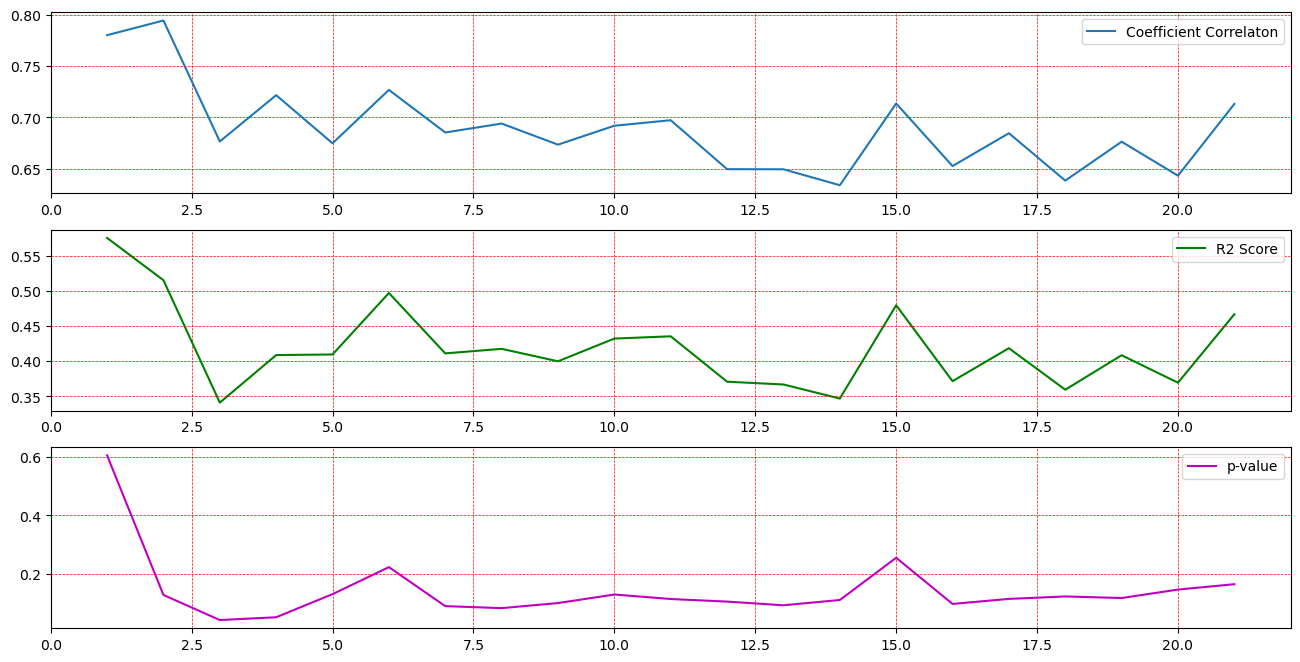

In [366]:
fig, axs = plt.subplots(3,figsize=(16,8))
axs[0].plot(max_depth_list, coef_list, label='Coefficient Correlaton')
axs[0].grid(color='r', linestyle='--', linewidth=0.5)
axs[0].legend()
axs[1].plot(max_depth_list, r2_score_list,c='g', label='R2 Score')
axs[1].grid(color='r', linestyle='--', linewidth=0.5)
axs[1].legend()
axs[2].plot(max_depth_list, t_test_list,c='m', label='p-value')
axs[2].grid(color='r', linestyle='--', linewidth=0.5)
axs[2].legend()

plt.savefig('Figure/tree_accuracy_changing_with_depth.png')
# Plot shows that the accuracy are at its maximum by max depth = 2 or 15.

In [367]:
feature_importance_score = list(regr.feature_importances_)

In [368]:
regr = DecisionTreeRegressor(max_depth=2)
regr = regr.fit(train_X, train_Y)
predict_Y = regr.predict(test_X)
predict_Y = np.array(np.floor(predict_Y).astype(int))

In [369]:
regr

DecisionTreeRegressor(max_depth=2)

In [370]:
predictions = np.array(np.floor(predict_Y).astype(int))
real = np.array(np.array(test_Y).astype(int))
# calculate coefficient matrix
coef = np.corrcoef(predictions, real)
print(coef[0,1])

0.7942629867603442


In [371]:
# R2 test
r2_score(real,predictions)

0.5151462707077415

In [372]:
# T-test
t_result = ttest(predictions, real)
print(t_result)

Ttest_indResult(statistic=-1.5289225216007691, pvalue=0.1284473456079152)


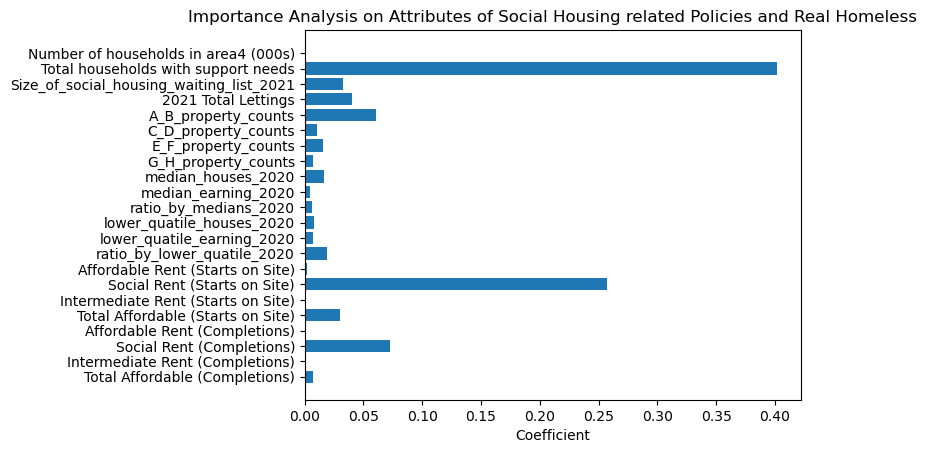

In [373]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(regr.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.savefig('Figure/tree_importance_score_analysis.png')
plt.show()

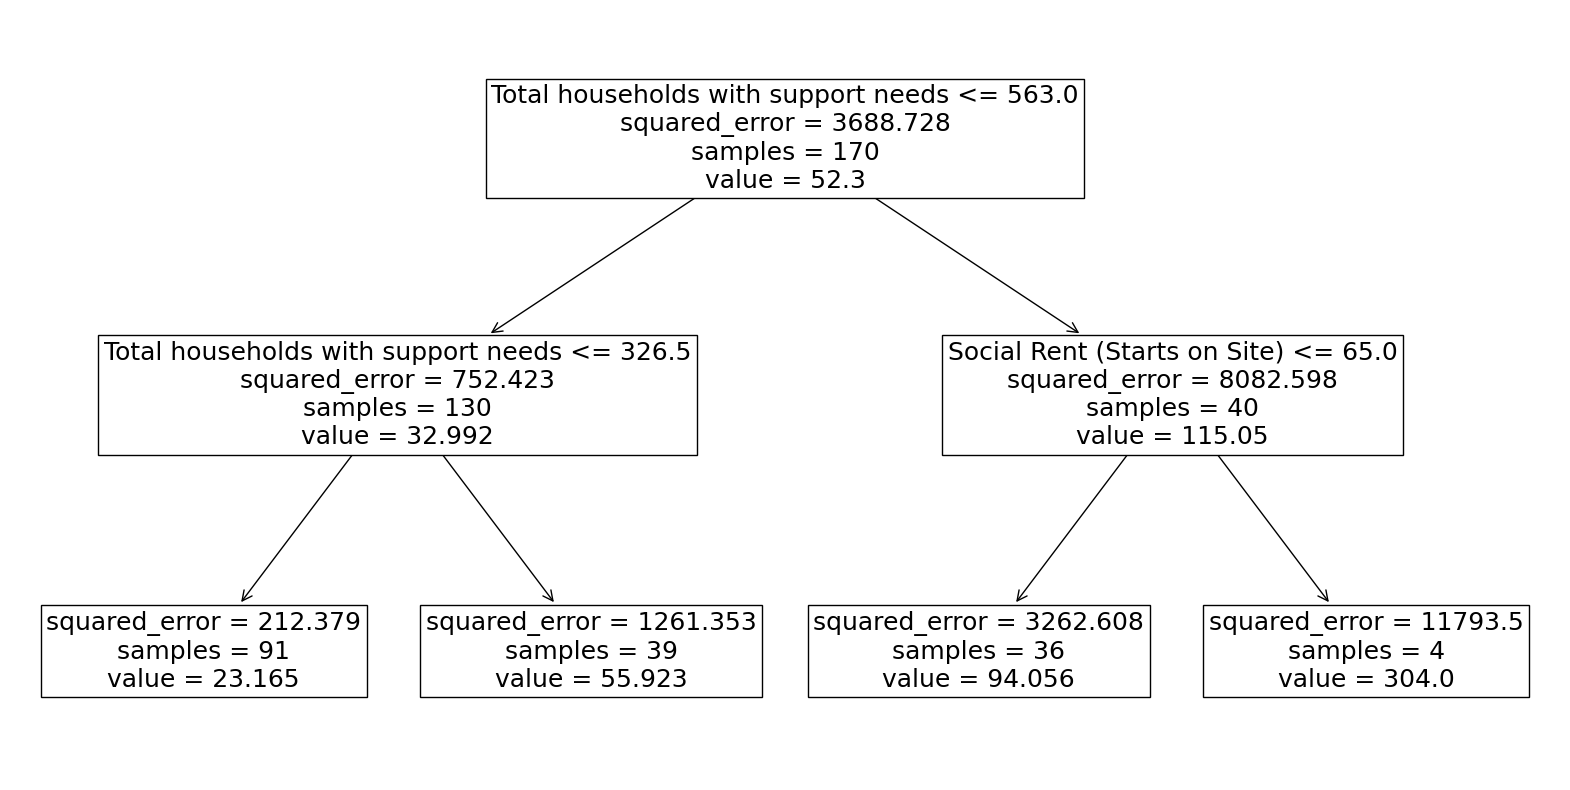

In [374]:
# #Plot the tree
plt.figure(figsize=(20,10))  # set plot size (denoted in inches)
tree.plot_tree(regr,feature_names=list(test_X),fontsize=18) 
plt.savefig('Figure/Decision_Tree.png')

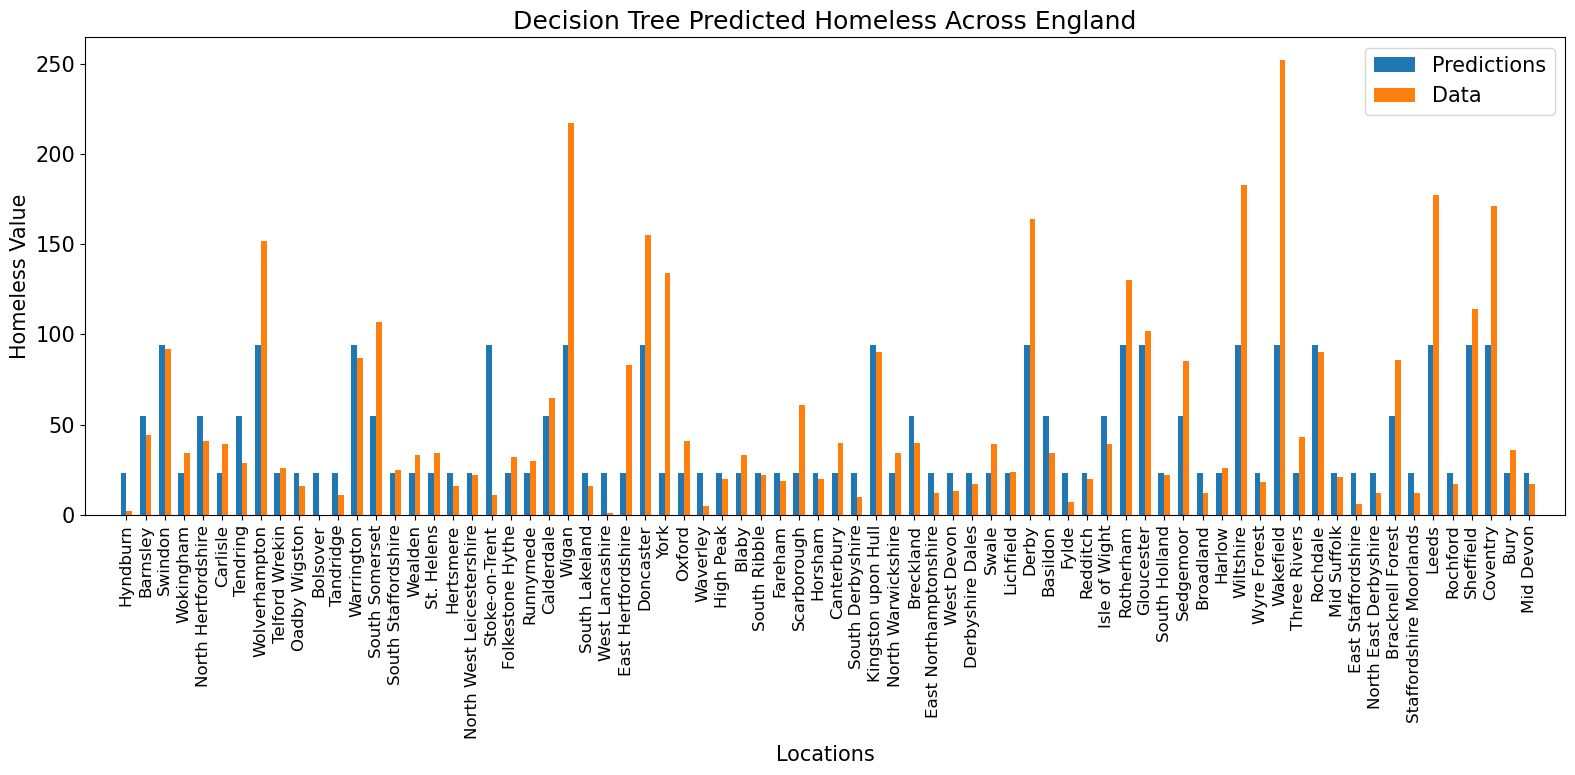

In [375]:
#Plot and save the test results
f_predictions = predict_Y
test_y = test_Y

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Homeless Value')
plt.title('Decision Tree Predicted Homeless Across England')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[test_y.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/Decision_Tree_test_result.png')
plt.show()